## <font color=blue >DAN demo.
This notebook demos how to train the DAN model on the CSV dataset files of ***SFC*** stream sensor. If you want to run it on other sensors, just change the parameter of ***--stream_sensor*** and ***--rain_sensor***.

In our dataset, the parameters should be set to:

--stream_sensor **Ross_S_fixed**
--rain_sensor **Ross_R_fixed** 

--stream_sensor **Saratoga_S_fixed** 
--rain_sensor **Saratoga_R_fixed** 

--stream_sensor **UpperPen_S_fixed** 
--rain_sensor **UpperPen_R_fixed** 

--stream_sensor **SFC_S_fixed** 
--rain_sensor **SFC_R_fixed** 

With DAN, you can build **uni-variate** model, which means you only have stream sensor data as the traininig data and the input to the model.

Also, you can build **multi-variate** model, which means you have stream sensor data and nearby rain sensor data. In this situation, the rain data can be the real rain record and the predicted rain data. 
    
Generally, the **predicted rain data** can be extended to the future days, which will be a good hint to help forecast the stream data. So if you have influent forecasted data to train the model, please think about adoping this since we can support this method by setting the parameter *r_shift* to make use of the future forecasted rain information.

## <font color=blue >Parameter setting. 

--**stream_sensor**: stream dataset file name. The file should be csv file.

--**rain_sensor**: rain dataset file name. The file should be csv file.

--**train_volume**: train set size.

--**hidden_dim**: hidden dim of lstm layers.

--**cnn_dim**: hidden dim of cnn layers.

--**layer**: number of layers.

--**stack_types**: model stacks specified for this sensor. It should be a stack of encoder, decoder and residue.

--**r_shift**: shift positions of rain hinter, set to 288 without any predicted rain value. Otherwise, set to 0~288 according to the length of known forecasted rain data.

--**watershed**: 1 if trained with rain info, else 0.

--**model**: model name, used to generate the pt file and predicted file names.

--**mode**: set it to 'train' or 'inference' with an existing pt_file.

--**pt_file**: if set, the model will be loaded from this pt file, otherwise check the file according to the assigned parameters.

--**save**: if save the predicted file of testset, set to 1, else 0.

## <font color=blue >Train a *uni-variate* model without rain data.

In [ ]:
! python options_SFC.py \
--stream_sensor SFC_S_fixed \
--rain_sensor SFC_R_fixed \
--model SFC_noRain \
--mode train \
--watershed 0 \
--r_shift 288 \
--stack_types '"encoder","decoder","encoder","decoder","residue"' \
--train_volume 30000 \
--hidden_dim 384 \

## <font color=blue >Train a *multi-variate* model with rain data.

In [ ]:
! python options_SFC.py \
--stream_sensor SFC_S_fixed \
--rain_sensor SFC_R_fixed \
--model SFC_withRain \
--mode train \
--watershed 1 \
--r_shift 0 \
--stack_types '"encoder","decoder","encoder","decoder","residue"' \
--train_volume 30000 \
--hidden_dim 384 \

## <font color=blue >Train a *multi-variate* model using forecasted rain data.

In [ ]:
! python options_SFC.py \
--stream_sensor SFC_S_fixed \
--rain_sensor SFC_R_fixed \
--model SFC_withRain_shift \
--mode train \
--watershed 1 \
--r_shift 0 \
--stack_types '"encoder","decoder","residue"' \
--train_volume 20000 \
--hidden_dim 512 \

## <font color=blue >Load a trained multi-variate model.

In [1]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
from models.DAN_M import *
# model name
pt = 'SFC_withRain'
# get model
model = Options().get_model(pt)


for sensor  SFC_S_fixed start_num is:  17626
train set length is :  1180452
mean is:  1.3893995522890237
std is  1.4236018607926855
gm3.means are:  [[  0.56968542]
 [174.25126833]
 [  8.54115031]]
gm3.covariances are:  [[[2.50918053e-01]]

 [[9.71385047e+04]]

 [[5.62293394e+01]]]
gm3.weights are:  [0.54092134 0.10234523 0.35673343]
Finish prob indicator generating.
for sensor  SFC_R_fixed start_num is:  269625
R_X set length is :  1180452
mean is:  0.0007207449397312904
std is  0.007359505976076972
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]
Finish prob indicator updating.
| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Encoder (#2)
| --  Stack Decoder (#3)
| --  Stack Residue (#4)
Importing the pt file: ./output/SFC_withRain/train/SFC_S_fixed_OS18_Shed-ProbFeatureSFC_withRain_net.pt
| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Encoder (#2)
| --  Stack Decoder (#3)
| --  Stack Residue (#4)


## <font color=blue >Use test_single to do inferencing on one time-point.

RMSE:  139.66732135095194
MAPE:  0.3246788859493147


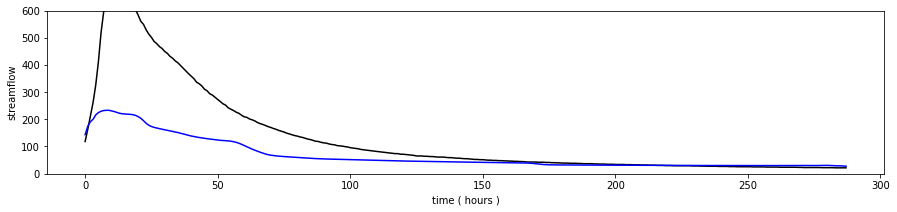

In [2]:
import numpy as np
from utils.utils2 import *
testP=["2021-12-16 00:30:00" ]
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Load a trained multi-variate model with forecasted rain data.

In [3]:
import numpy as np
import random
from utils.utils2 import *
from run import Options
from models.DAN_M import *
# model name
pt = 'SFC_withRain_shift'
# get model
model = Options().get_model(pt)

for sensor  SFC_S_fixed start_num is:  17626
train set length is :  1180452
mean is:  1.3893995522890237
std is  1.4236018607926855
gm3.means are:  [[  0.5697677 ]
 [  8.54394019]
 [174.29396462]]
gm3.covariances are:  [[[2.51016231e-01]]

 [[5.62767222e+01]]

 [[9.71616429e+04]]]
gm3.weights are:  [0.54096018 0.35672536 0.10231446]
Finish prob indicator generating.
for sensor  SFC_R_fixed start_num is:  269625
R_X set length is :  1180452
mean is:  0.0007207449397312904
std is  0.007359505976076972
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]
Finish prob indicator updating.
| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Residue (#2)
Importing the pt file: ./output/SFC_withRain_shift/train/SFC_S_fixed_OS18_Shed-ProbFeatureSFC_withRain_shift_net.pt
| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Residue (#2)


## <font color=blue >Inferencing for one time point.
If you already have test time point, use ***test_single*** function to do it, assuming stream input and rain data input can be retrieved from the dataset. 

RMSE:  65.53915466963569
MAPE:  0.33758786155636583


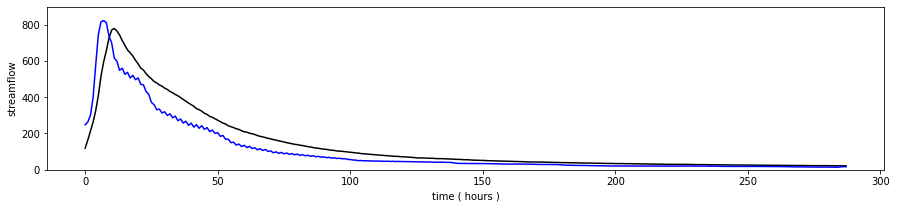

In [6]:
import numpy as np
from utils.utils2 import *
testP=["2021-12-16 00:30:00" ]
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Inferencing for real-world application.
If you already have test time point, history stream input and rain data input prepared, use ***predict*** function to do it.

In [8]:
# data generated randomly as an example. Use your own input data to replace them.
from models.Inference import *
testP=["2025-08-01 06:30:00" ]
indicator_data = [random.uniform(0, 1)/800 for _ in range(288)]
stream_data = [random.uniform(0, 1) for _ in range(15*24*4)]      
opt.pt_file='./output/SFC_withRain_shift/train/SFC_S_fixed_OS18_Shed-ProbFeatureSFC_withRain_shift_net.pt'
model = DAN_I(opt)
model.model_load()
for i in range(len(testP)):
    p = model.predict(testP[i], stream_data, indicator_data)
    print(p)

| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Residue (#2)
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]
Importing the pt file: ./output/SFC_withRain_shift/train/SFC_S_fixed_OS18_Shed-ProbFeatureSFC_withRain_shift_net.pt
| DANet
| --  Stack Encoder (#0)
| --  Stack Decoder (#1)
| --  Stack Residue (#2)
[0.99649185 1.04835577 1.04172301 1.0238818  0.99109392 0.93763571
 0.94467506 0.95902521 0.94918511 0.93189612 0.92456724 0.96805144
 1.07805779 1.12761903 1.1302215  1.1372289  1.14172251 1.15494428
 1.1454904  1.10033771 1.0501254  1.04562236 1.04265806 1.06336649
 1.06773734 1.08301071 1.07893901 1.08475774 1.07588848 1.07714275
 1.0675561  1.06838153 1.06021267 1.06145389 1.05382503 1.05453567
 1.04681101 1.04715006 1.03988923 1.04039481 1.03380275 1.03458199
 1.0286246  1.02879795 1.01580238 0.98772704 0.9519056  0.94521654
 0.93914118 0.94059019 0.93563647 0.9370084  0.93214154 0.93463549
 0.93638097 0.95651476 0.96377516 0.9684187